# Classification in PySpark's MLlib Project Solution

### Genre classification
Now it's time to leverage what we learned in the lectures to a REAL classification project! Have you ever wondered what makes us, humans, able to tell apart two songs of different genres? How we do we inherenly know the difference between a pop song and heavy metal? This type of classifcation may seem easy for us, but it's a very difficult challenge for a computer to do. So the question is, could an automatic genre classifcation model be possible? 

For this project we will be classifying songs based on a number of characteristics into a set of 23 electronic genres. This technology could be used by an application like Pandora to recommend songs to users or just create meaningful channels. Super fun!

### Dataset
*beatsdataset.csv*
Each row is an electronic music song. The dataset contains 100 song for each genre among 23 electronic music genres, they were the top (100) songs of their genres on November 2016. The 71 columns are audio features extracted of a two random minutes sample of the file audio. These features have been extracted using pyAudioAnalysis (https://github.com/tyiannak/pyAudioAnalysis).

### Your task
Create an algorithm that classifies songs into the 23 genres provided. Test out several different models and select the highest performing one. Also play around with feature selection methods and finally try to make a recommendation to a user.  

For the feature selection aspect of this project, you may need to get a bit creative if you want to select features from a non-tree algorithm. I did not go over this aspect of PySpark intentionally in the previous lectures to give you chance to get used to researching the PySpark documentation page. Here is the link to the Feature Selectors section of the documentation that just might come in handy: https://spark.apache.org/docs/latest/ml-features.html#feature-selectors

Good luck! Have fun :)

### Source
https://www.kaggle.com/caparrini/beatsdataset

Each raw  of 100 raw is electronic music song 
Each column of 71 column is audio features extracted from two random minute sample 

#  Genre classification Pipeline

*   1-Read the data set
*   2-Exploratory Data Analysis
*   3- Data preparation (Handling Missings ,outlires ,duplicates ) 
*   4-Feature Selection
*   5-Training
*   7-Testing and Validation
*   





In [1]:
# Install pyspark
!pip install pyspark
# import findspark
# findspark.init()
import os
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
# May take awhile locally
spark = SparkSession.builder.appName("Classification").getOrCreate()

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("You are working with", cores, "core(s)")
spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=d7d793b011cb445d5cb85cebf3e02ddc640ee9560b67cbc8a1f647ce21de94b6
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
You are working with 1 core(s)


# 1-Read Dataset 

In [2]:
from google.colab import files
upload = files.upload()

Saving beatsdataset.csv to beatsdataset.csv


In [3]:
df = spark.read.csv('beatsdataset.csv',inferSchema=True,header=True)

In [4]:
df.show(1000)

+---+---------------+----------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+----------------+----------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+-------

In [5]:
df.limit(6).toPandas()

,_c0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom
1,1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom
2,2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom
3,3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom
4,4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom
5,5,0.127047,0.153488,3.221987,0.261693,0.257361,1.090034,0.004943,0.230099,-21.234846,...,0.002986,0.006533,0.010347,0.025008,0.003035,0.019479,133.333333,0.168933,129.0,BigRoom


# 2-Exploratory Data Analysis

In [6]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- 1-ZCRm: double (nullable = true)
 |-- 2-Energym: double (nullable = true)
 |-- 3-EnergyEntropym: double (nullable = true)
 |-- 4-SpectralCentroidm: double (nullable = true)
 |-- 5-SpectralSpreadm: double (nullable = true)
 |-- 6-SpectralEntropym: double (nullable = true)
 |-- 7-SpectralFluxm: double (nullable = true)
 |-- 8-SpectralRolloffm: double (nullable = true)
 |-- 9-MFCCs1m: double (nullable = true)
 |-- 10-MFCCs2m: double (nullable = true)
 |-- 11-MFCCs3m: double (nullable = true)
 |-- 12-MFCCs4m: double (nullable = true)
 |-- 13-MFCCs5m: double (nullable = true)
 |-- 14-MFCCs6m: double (nullable = true)
 |-- 15-MFCCs7m: double (nullable = true)
 |-- 16-MFCCs8m: double (nullable = true)
 |-- 17-MFCCs9m: double (nullable = true)
 |-- 18-MFCCs10m: double (nullable = true)
 |-- 19-MFCCs11m: double (nullable = true)
 |-- 20-MFCCs12m: double (nullable = true)
 |-- 21-MFCCs13m: double (nullable = true)
 |-- 22-ChromaVector1m: double (null

In [7]:
df_pandas=df.toPandas()

## what is the genere that has the most energrtic value ?

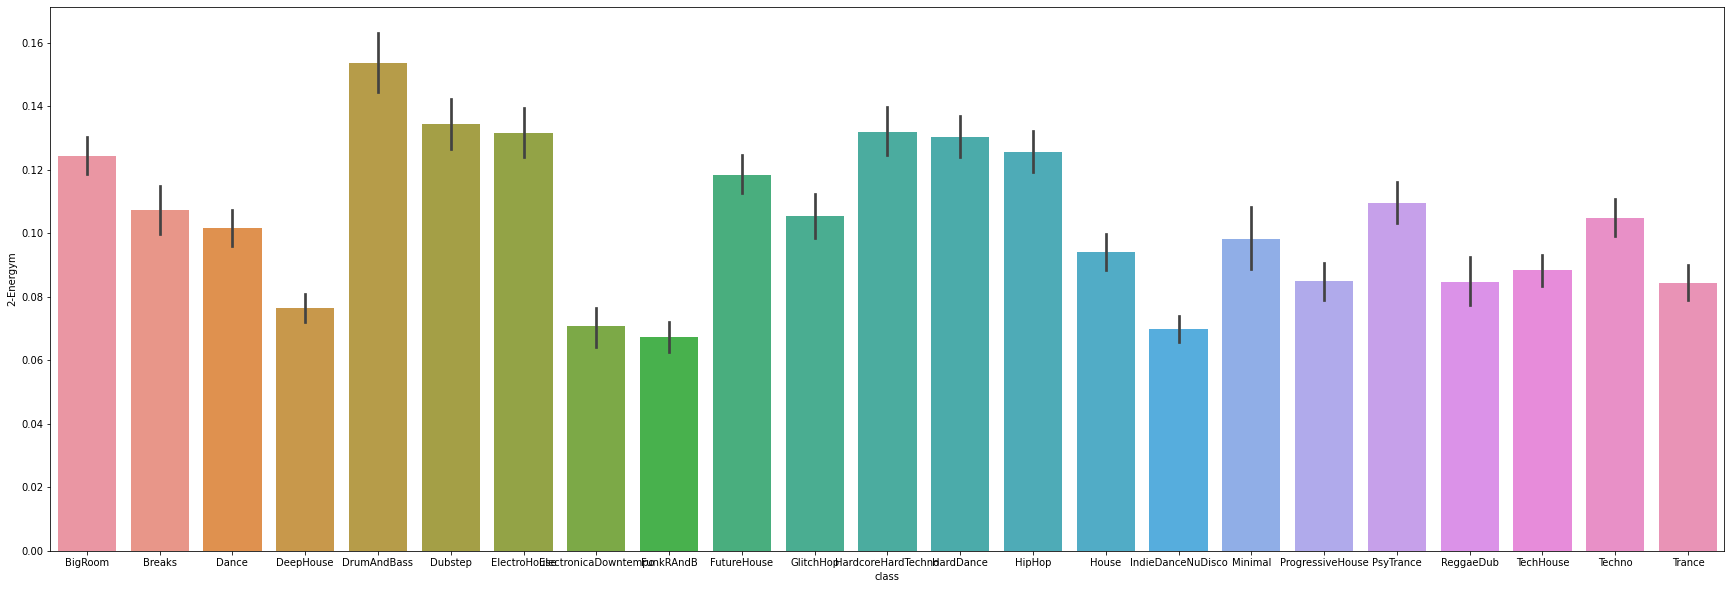

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(30,10))
sns.barplot(x = 'class',y = '2-Energym',data = df_pandas)
plt.show()

 **we can observe that DrumAndBass has the most energym value.**

## What is the genere that has the most spectrum Entropy?

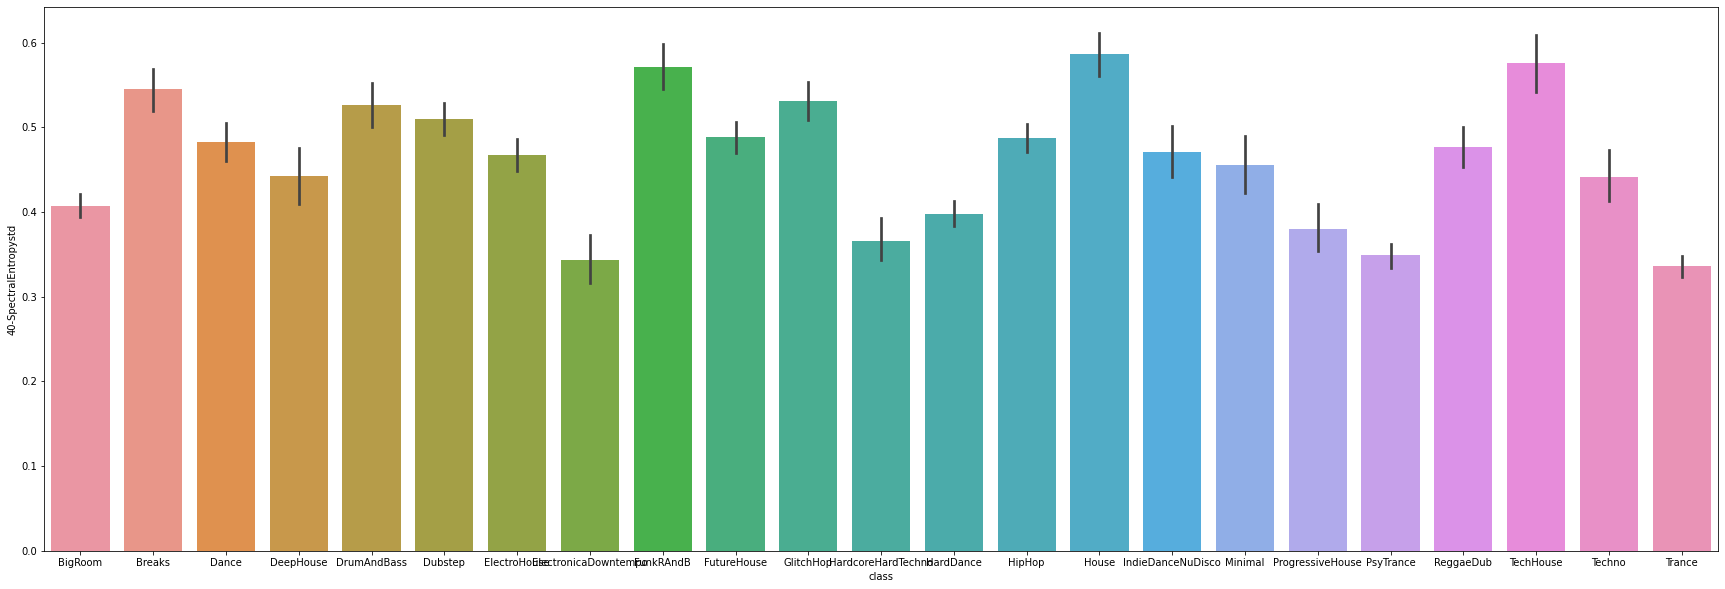

In [9]:
plt.subplots(figsize=(30,10))
sns.barplot(x = 'class',y = '40-SpectralEntropystd',data = df_pandas)
plt.show()

 **we can observe that house genere has the most spectrum entropy**

## How many songs for each class?

In [10]:
df.groupBy("class").count().show(10)

+--------------------+-----+
|               class|count|
+--------------------+-----+
|           PsyTrance|  100|
|           HardDance|  100|
|              Breaks|  100|
|  HardcoreHardTechno|  100|
|   IndieDanceNuDisco|  100|
|              Trance|  100|
|           DeepHouse|  100|
|ElectronicaDowntempo|  100|
|           ReggaeDub|  100|
|             Minimal|  100|
+--------------------+-----+
only showing top 10 rows



<Axes: >

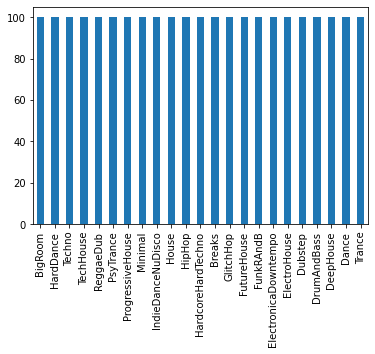

In [11]:

df_pandas['class'].value_counts().plot(kind='bar')

** We have 100 song for each class of 23 class** 

## calculate correlation for spectrum and enereg features

<Axes: >

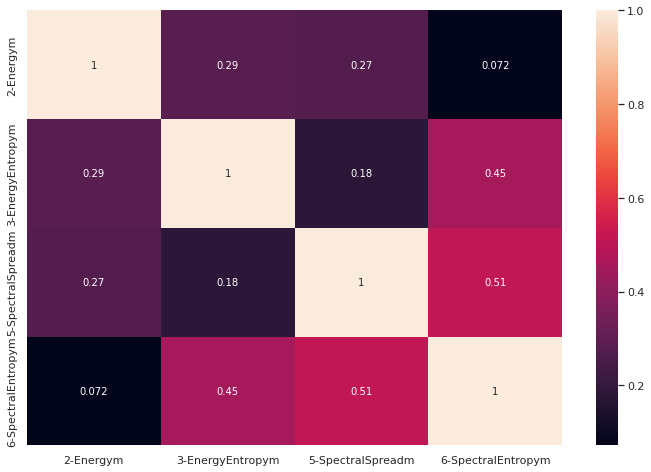

In [12]:
corr = df_pandas[['2-Energym','3-EnergyEntropym','5-SpectralSpreadm',
'6-SpectralEntropym']].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

As we can observed there is a positive correlation between Energym and spectralspread 
and between energyEntropy and spectral Entropy

So we can conclude as the spectrum increased the song became more energetic

#3- Data preparation (Handling Missings ,outlires ,duplicates )

# Format Data 


```

```



In [13]:
from pyspark.sql.functions import * 
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
df = df.withColumn("class", df['class'].cast(StringType())) 
str_indxr = StringIndexer(inputCol="class",outputCol='label')
indexed = str_indxr.fit(df).transform(df)
# indexed.groupBy('label').count().show()

In [14]:
# Data Prep function
def MLClassifierDFPrep(df,input_columns,dependent_var,treat_outliers=True,treat_neg_values=True):
    
    # change label (class variable) to string type to prep for reindexing
    # Pyspark is expecting a zero indexed integer for the label column. 
    # Just incase our data is not in that format... we will treat it by using the StringIndexer built in method
    renamed = df.withColumn("label_str", df[dependent_var].cast(StringType())) #Rename and change to string type
    indexer = StringIndexer(inputCol="label_str", outputCol="label") #Pyspark is expecting the this naming convention 
    indexed = indexer.fit(renamed).transform(renamed)

    # Convert all string type data in the input column list to numeric
    # Otherwise the Algorithm will not be able to process it
    numeric_inputs = []
    string_inputs = []
    for column in input_columns:
        if str(indexed.schema[column].dataType) == 'StringType':
            indexer = StringIndexer(inputCol=column, outputCol=column+"_num") 
            indexed = indexer.fit(indexed).transform(indexed)
            new_col_name = column+"_num"
            string_inputs.append(new_col_name)
        else:
            numeric_inputs.append(column)
            
    if treat_outliers == True:
        print("We are correcting for non normality now!")
        # empty dictionary d
        d = {}
        # Create a dictionary of quantiles
        for col in numeric_inputs: 
            d[col] = indexed.approxQuantile(col,[0.01,0.99],0.25) #if you want to make it go faster increase the last number
        #Now fill in the values
        for col in numeric_inputs:
            skew = indexed.agg(skewness(indexed[col])).collect() #check for skewness
            skew = skew[0][0]
            # This function will floor, cap and then log+1 (just in case there are 0 values)
            if skew > 1:
                indexed = indexed.withColumn(col, \
                log(when(df[col] < d[col][0],d[col][0])\
                .when(indexed[col] > d[col][1], d[col][1])\
                .otherwise(indexed[col] ) +1).alias(col))
                print(col+" has been treated for positive (right) skewness. (skew =)",skew,")")
            elif skew < -1:
                indexed = indexed.withColumn(col, \
                exp(when(df[col] < d[col][0],d[col][0])\
                .when(indexed[col] > d[col][1], d[col][1])\
                .otherwise(indexed[col] )).alias(col))
                print(col+" has been treated for negative (left) skewness. (skew =",skew,")")

            
    # Produce a warning if there are negative values in the dataframe that Naive Bayes cannot be used. 
    # Note: we only need to check the numeric input values since anything that is indexed won't have negative values
    minimums = df.select([min(c).alias(c) for c in df.columns if c in numeric_inputs]) # Calculate the mins for all columns in the df
    min_array = minimums.select(array(numeric_inputs).alias("mins")) # Create an array for all mins and select only the input cols
    df_minimum = min_array.select(array_min(min_array.mins)).collect() # Collect golobal min as Python object
    df_minimum = df_minimum[0][0] # Slice to get the number itself

    features_list = numeric_inputs + string_inputs
    assembler = VectorAssembler(inputCols=features_list,outputCol='features')
    output = assembler.transform(indexed).select('features','label')

#     final_data = output.select('features','label') #drop everything else
    
    # Now check for negative values and ask user if they want to correct that? 
    if df_minimum < 0:
        print(" ")
        print("WARNING: The Naive Bayes Classifier will not be able to process your dataframe as it contains negative values")
        print(" ")
    
    if treat_neg_values == True:
        print("You have opted to correct that by rescaling all your features to a range of 0 to 1")
        print(" ")
        print("We are rescaling you dataframe....")
        scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

        # Compute summary statistics and generate MinMaxScalerModel
        scalerModel = scaler.fit(output)

        # rescale each feature to range [min, max].
        scaled_data = scalerModel.transform(output)
        final_data = scaled_data.select('label','scaledFeatures')
        final_data = final_data.withColumnRenamed('scaledFeatures','features')
        print("Done!")

    else:
        print("You have opted not to correct that therefore you will not be able to use to Naive Bayes classifier")
        print("We will return the dataframe unscaled.")
        final_data = output
    
    return final_data

In [15]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import * 
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import MinMaxScaler

df = df.drop('_c0') # drop first column 
input_columns = df.columns[1:-1]
dependent_var = 'class'

final_data = MLClassifierDFPrep(df,input_columns,dependent_var)
final_data.limit(5).toPandas()

We are correcting for non normality now!
7-SpectralFluxm has been treated for positive (right) skewness. (skew =) 1.6396138160129063 )
22-ChromaVector1m has been treated for positive (right) skewness. (skew =) 2.4162415204309258 )
23-ChromaVector2m has been treated for positive (right) skewness. (skew =) 4.154796693680583 )
24-ChromaVector3m has been treated for positive (right) skewness. (skew =) 1.1974019617504328 )
25-ChromaVector4m has been treated for positive (right) skewness. (skew =) 2.446635863594906 )
26-ChromaVector5m has been treated for positive (right) skewness. (skew =) 2.154482876187508 )
27-ChromaVector6m has been treated for positive (right) skewness. (skew =) 2.01234064472543 )
28-ChromaVector7m has been treated for positive (right) skewness. (skew =) 1.1829228989215521 )
29-ChromaVector8m has been treated for positive (right) skewness. (skew =) 3.7372643733999955 )
30-ChromaVector9m has been treated for positive (right) skewness. (skew =) 2.4117416421548645 )
31-Chr

,label,features
0,0.0,"[0.30338998025826874, 0.8957733872366486, 0.61..."
1,0.0,"[0.37399300906442695, 0.8816024910399278, 0.56..."
2,0.0,"[0.44679648775095127, 0.7434979440255818, 0.46..."
3,0.0,"[0.5860529526571694, 0.7966282209370411, 0.518..."
4,0.0,"[0.5186704525553854, 0.8825805153845844, 0.725..."


In [16]:
final_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[0.30338998025826...|
|  0.0|[0.37399300906442...|
|  0.0|[0.44679648775095...|
|  0.0|[0.58605295265716...|
|  0.0|[0.51867045255538...|
|  0.0|[0.53704862759740...|
|  0.0|[0.36610043340353...|
|  0.0|[0.28833375902182...|
|  0.0|[0.51348937539023...|
|  0.0|[0.44188100301752...|
|  0.0|[0.56945373664701...|
|  0.0|[0.37538743054984...|
|  0.0|[0.59208221389722...|
|  0.0|[0.49602450451477...|
|  0.0|[0.44102406047498...|
|  0.0|[0.30292002346477...|
|  0.0|[0.40585185504418...|
|  0.0|[0.42819003402878...|
|  0.0|[0.36745630460104...|
|  0.0|[0.47253668468282...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
df.show()

+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+--------------+----------------+----------------+-----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------------+---------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+-------------------+--

## calculating missings 

In [17]:
from pyspark.sql.functions import isnan, when, count, col

nulls = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
percent = df.select([format_number(((count(when(isnan(c) | col(c).isNull(), c))/df.count())*100),1).alias(c) for c in df.columns])

result = nulls.union(percent)

result.toPandas()

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing values in the data set

# 4-Features Selection 

In [ ]:
from pyspark.ml.feature import VectorSlicer
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import Row

slicer = VectorSlicer(inputCol="features", outputCol="selectedfeatures", indices=[1])

output = slicer.transform(final_data)

output.select("features", "selectedfeatures").show()

+--------------------+--------------------+
|            features|    selectedfeatures|
+--------------------+--------------------+
|[0.30338998025826...|[0.8957733872366486]|
|[0.37399300906442...|[0.8816024910399278]|
|[0.44679648775095...|[0.7434979440255818]|
|[0.58605295265716...|[0.7966282209370411]|
|[0.51867045255538...|[0.8825805153845844]|
|[0.53704862759740...|[0.9366879335151957]|
|[0.36610043340353...|[0.8301498598791096]|
|[0.28833375902182...|[0.7913885661814694]|
|[0.51348937539023...|[0.8596386312593476]|
|[0.44188100301752...|[0.7311306494555135]|
|[0.56945373664701...|[0.9640035330681084]|
|[0.37538743054984...|[0.9590443978826131]|
|[0.59208221389722...|[0.7820484079296268]|
|[0.49602450451477...| [0.864391463449406]|
|[0.44102406047498...|[0.8260906140727508]|
|[0.30292002346477...|[0.8267150246079552]|
|[0.40585185504418...|[0.8113030840888685]|
|[0.42819003402878...|[0.8293505384319086]|
|[0.36745630460104...|[0.8428873788795865]|
|[0.47253668468282...|[0.8336434

Data splitting for Test and Training 

In [19]:
train,test = final_data.randomSplit([0.7,0.3])

# 5-Training 
### first using logistic Regression 

In [20]:
from pyspark.ml.classification import *
classifier = LogisticRegression()
fitModel = classifier.fit(train)

### Evaluate the model using AUC and accuracy 


In [21]:
from pyspark.ml.evaluation import *

predictionAndLabels = fitModel.transform(test)
# predictionAndLabels = predictionAndLabels.predictions.select('label','prediction')
Bin_evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction') #labelCol='label'
auc = Bin_evaluator.evaluate(predictionAndLabels)
print("AUC:",auc)

predictions = fitModel.transform(test)
MC_evaluator = MulticlassClassificationEvaluator(metricName="accuracy") # redictionCol="prediction",
accuracy = (MC_evaluator.evaluate(predictions))*100
print("Accuracy: {0:.2f}".format(accuracy),"%") #     print("Test Error = %g " % (1.0 - accuracy))
print(" ")

AUC: 0.7882036196839008
Accuracy: 43.36 %
 


## Create all encompassing Classification Training and Evaluation Function

In [22]:
def ClassTrainEval(classifier,features,classes,train,test):

    def FindMtype(classifier):
        # Intstantiate Model
        M = classifier
        # Learn what it is
        Mtype = type(M).__name__
        
        return Mtype
    
    Mtype = FindMtype(classifier)
    

    def IntanceFitModel(Mtype,classifier,classes,features,train):
        
        if Mtype == "OneVsRest":
            # instantiate the base classifier.
            lr = LogisticRegression()
            # instantiate the One Vs Rest Classifier.
            OVRclassifier = OneVsRest(classifier=lr)
#             fitModel = OVRclassifier.fit(train)
            # Add parameters of your choice here:
            paramGrid = ParamGridBuilder() \
                .addGrid(lr.regParam, [0.1, 0.01]) \
                .build()
            #Cross Validator requires the following parameters:
            crossval = CrossValidator(estimator=OVRclassifier,
                                      estimatorParamMaps=paramGrid,
                                      evaluator=MulticlassClassificationEvaluator(),
                                      numFolds=2) # 3 is best practice
            # Run cross-validation, and choose the best set of parameters.
            fitModel = crossval.fit(train)
            return fitModel
        if Mtype == "MultilayerPerceptronClassifier":
            # specify layers for the neural network:
            # input layer of size features, two intermediate of features+1 and same size as features
            # and output of size number of classes
            # Note: crossvalidator cannot be used here
            features_count = len(features[0][0])
            layers = [features_count, features_count+1, features_count, classes]
            MPC_classifier = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)
            fitModel = MPC_classifier.fit(train)
            return fitModel
        if Mtype in("LinearSVC","GBTClassifier") and classes != 2: # These classifiers currently only accept binary classification
            print(Mtype," could not be used because PySpark currently only accepts binary classification data for this algorithm")
            return
        if Mtype in("LogisticRegression","NaiveBayes","RandomForestClassifier","GBTClassifier","LinearSVC","DecisionTreeClassifier"):
  
            # Add parameters of your choice here:
            if Mtype in("LogisticRegression"):
                paramGrid = (ParamGridBuilder() \
#                              .addGrid(classifier.regParam, [0.1, 0.01]) \
                             .addGrid(classifier.maxIter, [10, 15,20])
                             .build())
                
            # Add parameters of your choice here:
            if Mtype in("NaiveBayes"):
                paramGrid = (ParamGridBuilder() \
                             .addGrid(classifier.smoothing, [0.0, 0.2, 0.4, 0.6]) \
                             .build())
                
            # Add parameters of your choice here:
            if Mtype in("RandomForestClassifier"):
                paramGrid = (ParamGridBuilder() \
                               .addGrid(classifier.maxDepth, [2, 5, 10])
#                                .addGrid(classifier.maxBins, [5, 10, 20])
#                                .addGrid(classifier.numTrees, [5, 20, 50])
                             .build())
                
            # Add parameters of your choice here:
            if Mtype in("GBTClassifier"):
                paramGrid = (ParamGridBuilder() \
#                              .addGrid(classifier.maxDepth, [2, 5, 10, 20, 30]) \
#                              .addGrid(classifier.maxBins, [10, 20, 40, 80, 100]) \
                             .addGrid(classifier.maxIter, [10, 15,50,100])
                             .build())
                
            # Add parameters of your choice here:
            if Mtype in("LinearSVC"):
                paramGrid = (ParamGridBuilder() \
                             .addGrid(classifier.maxIter, [10, 15]) \
                             .addGrid(classifier.regParam, [0.1, 0.01]) \
                             .build())
            
            # Add parameters of your choice here:
            if Mtype in("DecisionTreeClassifier"):
                paramGrid = (ParamGridBuilder() \
#                              .addGrid(classifier.maxDepth, [2, 5, 10, 20, 30]) \
                             .addGrid(classifier.maxBins, [10, 20, 40, 80, 100]) \
                             .build())
            
            #Cross Validator requires all of the following parameters:
            crossval = CrossValidator(estimator=classifier,
                                      estimatorParamMaps=paramGrid,
                                      evaluator=MulticlassClassificationEvaluator(),
                                      numFolds=2) # 3 + is best practice
            # Fit Model: Run cross-validation, and choose the best set of parameters.
            fitModel = crossval.fit(train)
            return fitModel
    
    fitModel = IntanceFitModel(Mtype,classifier,classes,features,train)
    
    # Print feature selection metrics
    if fitModel is not None:
        
        if Mtype in("OneVsRest"):
            # Get Best Model
            BestModel = fitModel.bestModel
            print(" ")
            print('\033[1m' + Mtype + '\033[0m')
            # Extract list of binary models
            models = BestModel.models
            for model in models:
                print('\033[1m' + 'Intercept: '+ '\033[0m',model.intercept,'\033[1m' + '\nCoefficients:'+ '\033[0m',model.coefficients)

        if Mtype == "MultilayerPerceptronClassifier":
            print("")
            print('\033[1m' + Mtype," Weights"+ '\033[0m')
            print('\033[1m' + "Model Weights: "+ '\033[0m',fitModel.weights.size)
            print("")

        if Mtype in("DecisionTreeClassifier", "GBTClassifier","RandomForestClassifier"):
            # FEATURE IMPORTANCES
            # Estimate of the importance of each feature.
            # Each feature’s importance is the average of its importance across all trees 
            # in the ensemble The importance vector is normalized to sum to 1. 
            # Get Best Model
            BestModel = fitModel.bestModel
            print(" ")
            print('\033[1m' + Mtype," Feature Importances"+ '\033[0m')
            print("(Scores add up to 1)")
            print("Lowest score is the least important")
            print(" ")
            featureImportances = BestModel.featureImportances.toArray()
            print(featureImportances)
            
            if Mtype in("DecisionTreeClassifier"):
                global DT_featureImportances
                DT_featureImportances = BestModel.featureImportances.toArray()
                global DT_BestModel
                DT_BestModel = BestModel
            if Mtype in("GBTClassifier"):
                global GBT_featureImportances
                GBT_featureImportances = BestModel.featureImportances.toArray()
                global GBT_BestModel
                GBT_BestModel = BestModel
            if Mtype in("RandomForestClassifier"):
                global RF_featureImportances
                RF_featureImportances = BestModel.featureImportances.toArray()
                global RF_BestModel
                RF_BestModel = BestModel

        if Mtype in("LogisticRegression"):
            # Get Best Model
            BestModel = fitModel.bestModel
            print(" ")
            print('\033[1m' + Mtype," Coefficient Matrix"+ '\033[0m')
            print("You should compares these relative to eachother")
            print("Coefficients: \n" + str(BestModel.coefficientMatrix))
            print("Intercept: " + str(BestModel.interceptVector))
            global LR_coefficients
            LR_coefficients = BestModel.coefficientMatrix.toArray()
            global LR_BestModel
            LR_BestModel = BestModel

        if Mtype in("LinearSVC"):
            # Get Best Model
            BestModel = fitModel.bestModel
            print(" ")
            print('\033[1m' + Mtype," Coefficients"+ '\033[0m')
            print("You should compares these relative to eachother")
            print("Coefficients: \n" + str(BestModel.coefficients))
            global LSVC_coefficients
            LSVC_coefficients = BestModel.coefficients.toArray()
            global LSVC_BestModel
            LSVC_BestModel = BestModel
        
   
    # Set the column names to match the external results dataframe that we will join with later:
    columns = ['Classifier', 'Result']
    
    if Mtype in("LinearSVC","GBTClassifier") and classes != 2:
        Mtype = [Mtype] # make this a list
        score = ["N/A"]
        result = spark.createDataFrame(zip(Mtype,score), schema=columns)
    else:
        predictions = fitModel.transform(test)
        MC_evaluator = MulticlassClassificationEvaluator(metricName="accuracy") # redictionCol="prediction",
        accuracy = (MC_evaluator.evaluate(predictions))*100
        Mtype = [Mtype] # make this a string
        score = [str(accuracy)] #make this a string and convert to a list
        result = spark.createDataFrame(zip(Mtype,score), schema=columns)
        result = result.withColumn('Result',result.Result.substr(0, 5))
        
    return result
    #Also returns the fit model important scores or p values

In [23]:
# Run!
from pyspark.ml.classification import *
from pyspark.ml.evaluation import *
from pyspark.sql import functions
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Comment out Naive Bayes if your data still contains negative values
classifiers = [
                LogisticRegression()
                ,OneVsRest()
               ,LinearSVC()
               ,NaiveBayes()
               ,RandomForestClassifier()
               ,GBTClassifier()
               ,DecisionTreeClassifier()
               ,MultilayerPerceptronClassifier()
              ] 

train,test = final_data.randomSplit([0.7,0.3])
features = final_data.select(['features']).collect()
# Learn how many classes there are in order to specify evaluation type based on binary or multi and turn the df into an object
class_count = final_data.select(countDistinct("label")).collect()
classes = class_count[0][0]

#set up your results table
columns = ['Classifier', 'Result']
vals = [("Place Holder","N/A")]
results = spark.createDataFrame(vals, columns)

for classifier in classifiers:
    new_result = ClassTrainEval(classifier,features,classes,train,test)
    results = results.union(new_result)
results = results.where("Classifier!='Place Holder'")
results.show(100,False)

 
LogisticRegression  Coefficient Matrix
You should compares these relative to eachother
Coefficients: 
DenseMatrix([[  4.57502285,   2.279765  ,   0.73081687, ...,  -4.72100496,
               -1.92946501,   4.41121058],
             [ -0.12113744,   1.82382833,   0.76149348, ...,   7.15661235,
              -10.36859586,   5.56962974],
             [  1.02946939,   5.52174569,  -1.26051142, ...,  -4.38705143,
                1.00832139,  -3.75531569],
             ...,
             [ -1.09005606,  -0.12989341,   0.20732337, ...,  -5.23195062,
                2.16347552,   3.70355202],
             [ -1.34206955,  -0.65013271,   0.42963057, ...,  -1.45192074,
                2.08246184,   2.3328295 ],
             [ -2.91286147,   1.51255119,   1.39392425, ...,  -2.59106838,
                4.22710577,   3.68019475]])
Intercept: [-2.6334784620882017,1.575759467278882,-7.543197353423715,5.273048412586714,-1.9356075931159231,-11.835519639796793,-3.8133495956517733,12.821186833327877,-1.

# 6-Testing and Validation

## Classification Diagnostics
compare calsses and evaluate them in differnet evaluation metrics

In [24]:
from pyspark.ml.evaluation import *
from pyspark.ml.classification import *

def ClassDiag(classifier):
    
    # Fit our model
    C = classifier
    fitModel = C.fit(train)

    # Load the Summary
    trainingSummary = fitModel.summary

    # General Describe
    trainingSummary.predictions.describe().show()

    # View Predictions
    pred_and_labels = fitModel.evaluate(test)
    pred_and_labels.predictions.show()

    # Print the coefficients and intercept for multinomial logistic regression
    print("Coefficients: \n" + str(fitModel.coefficientMatrix))
    print(" ")
    print("Intercept: " + str(fitModel.interceptVector))
    print(" ")

    # Obtain the objective per iteration
    objectiveHistory = trainingSummary.objectiveHistory
    print(" ")
    print("objectiveHistory:")
    for objective in objectiveHistory:
        print(objective)

    # for multiclass, we can inspect metrics on a per-label basis
    print(" ")
    print("False positive rate by label:")
    for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print(" ")
    print("True positive rate by label:")
    for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print(" ")
    print("Precision by label:")
    for i, prec in enumerate(trainingSummary.precisionByLabel):
        print("label %d: %s" % (i, prec))

    print(" ")
    print("Recall by label:")
    for i, rec in enumerate(trainingSummary.recallByLabel):
        print("label %d: %s" % (i, rec))

    print(" ")
    print("F-measure by label:")
    for i, f in enumerate(trainingSummary.fMeasureByLabel()):
        print("label %d: %s" % (i, f))

    accuracy = trainingSummary.accuracy
    falsePositiveRate = trainingSummary.weightedFalsePositiveRate
    truePositiveRate = trainingSummary.weightedTruePositiveRate
    fMeasure = trainingSummary.weightedFMeasure()
    precision = trainingSummary.weightedPrecision
    recall = trainingSummary.weightedRecall
    print(" ")
    print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
          % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

In [25]:
# classifier = LogisticRegression()
ClassDiag(LogisticRegression())

+-------+------------------+------------------+
|summary|             label|        prediction|
+-------+------------------+------------------+
|  count|              1602|              1602|
|   mean|10.914481897627965|10.980649188514358|
| stddev| 6.626526859984274| 6.704823146037502|
|    min|               0.0|               0.0|
|    max|              22.0|              22.0|
+-------+------------------+------------------+

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[0.14898322372506...|[6.98732515682343...|[7.66211736229423...|      22.0|
|  0.0|[0.26358612305685...|[8.68853107755152...|[0.01007955590516...|      22.0|
|  0.0|[0.28208756249016...|[8.84917332215471...|[0.89627833967274...|       0.0|
|  0.0|[0.28833375902182...|[1.87694029444182...|[0.00108494687315...|     

As random forest achieve heighest accuracy ,I tried to calculate the rest of metrics for it ,I couldn't use classDiag function as it is with random forest as it hasn't cofficientMatrix so I overrided it 

In [31]:
from pyspark.ml.evaluation import *
from pyspark.ml.classification import *

def ClassDiag_RandomForest(classifier):
    
    # Fit our model
    C = classifier
    fitModel = C.fit(train)

    # Load the Summary
    trainingSummary = fitModel.summary

    # General Describe
    trainingSummary.predictions.describe().show()

    # View Predictions
    pred_and_labels = fitModel.evaluate(test)
    pred_and_labels.predictions.show()



    # Obtain the objective per iteration
    objectiveHistory = trainingSummary.objectiveHistory
    print(" ")
    print("objectiveHistory:")
    for objective in objectiveHistory:
        print(objective)

    # for multiclass, we can inspect metrics on a per-label basis
    print(" ")
    print("False positive rate by label:")
    for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print(" ")
    print("True positive rate by label:")
    for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
        print("label %d: %s" % (i, rate))

    print(" ")
    print("Precision by label:")
    for i, prec in enumerate(trainingSummary.precisionByLabel):
        print("label %d: %s" % (i, prec))

    print(" ")
    print("Recall by label:")
    for i, rec in enumerate(trainingSummary.recallByLabel):
        print("label %d: %s" % (i, rec))

    print(" ")
    print("F-measure by label:")
    for i, f in enumerate(trainingSummary.fMeasureByLabel()):
        print("label %d: %s" % (i, f))

    accuracy = trainingSummary.accuracy
    falsePositiveRate = trainingSummary.weightedFalsePositiveRate
    truePositiveRate = trainingSummary.weightedTruePositiveRate
    fMeasure = trainingSummary.weightedFMeasure()
    precision = trainingSummary.weightedPrecision
    recall = trainingSummary.weightedRecall
    print(" ")
    print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
          % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

In [32]:
# classifier = LogisticRegression()
classifier =RandomForestClassifier()
ClassDiag_RandomForest(RandomForestClassifier())

+-------+------------------+------------------+
|summary|             label|        prediction|
+-------+------------------+------------------+
|  count|              1602|              1602|
|   mean|10.914481897627965|10.242197253433208|
| stddev| 6.626526859984274| 6.884159163356548|
|    min|               0.0|               0.0|
|    max|              22.0|              22.0|
+-------+------------------+------------------+

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[0.14898322372506...|[2.52893104760426...|[0.12644655238021...|      22.0|
|  0.0|[0.26358612305685...|[3.89262538351952...|[0.19463126917597...|       0.0|
|  0.0|[0.28208756249016...|[3.41139489077060...|[0.17056974453853...|      22.0|
|  0.0|[0.28833375902182...|[2.38743876492345...|[0.11937193824617...|     